In [32]:
!pip install medmnist

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 KB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116952 sha256=f1d1a51087cae53efb6fadcc9ee97c835164b4c868bfd3c2dfa4818e72d7bb75
  Stored in directory: /root/.cache/pip/wheels/f7/f1/89/b9ea2bf8f80ec027a88fef1d354b3816b4d3d29530988972f6
Successfully built fire


In [29]:
from tqdm import tqdm
# for some reason, it has to be pip install numpy, otherwise kernel is killed
# keep in mind, this numpy has inconsistency with scipy
import numpy as np
import os
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import torch.utils.data as data
import torchvision.transforms as transforms

In [33]:
import medmnist
from medmnist import INFO

In [31]:
os.getcwd()

'/content'

# Bio terminologies:
**pathology**: the science of the causes and effects of diseases, especially the branch of medicine that deals with the laboratory examination of samples of body tissue for diagnostic or forensic purposes.<br>
**thorax**: the part of the body of a mammal between the neck and the abdomen, including the cavity enclosed by the ribs, breastbone, and dorsal vertebrae, and containing the chief organs of circulation and respiration; **the chest**.<br>
**Derma**: The inner layer of the two main layers of the skin.<br>
**OCT**: Optical coherence tomography is an imaging technique that uses low-coherence light to capture micrometer-resolution, two- and three-dimensional images from within optical scattering media. It is used for medical imaging and industrial nondestructive testing. <br>
**Pneumonia**: an infection that inflames the air sacs in one or both lungs

In [ ]:
# a brief intro of each dataset
# medmnist.INFO

In [ ]:
# the first data I am trying to generate
INFO['dermamnist']

{'python_class': 'DermaMNIST',
 'description': 'The DermaMNIST is based on the HAM10000, a large collection of multi-source dermatoscopic images of common pigmented skin lesions. The dataset consists of 10,015 dermatoscopic images categorized as 7 different diseases, formulized as a multi-class classification task. We split the images into training, validation and test set with a ratio of 7:1:2. The source images of 3×600×450 are resized into 3×28×28.',
 'url': 'https://zenodo.org/record/6496656/files/dermamnist.npz?download=1',
 'MD5': '0744692d530f8e62ec473284d019b0c7',
 'task': 'multi-class',
 'label': {'0': 'actinic keratoses and intraepithelial carcinoma',
  '1': 'basal cell carcinoma',
  '2': 'benign keratosis-like lesions',
  '3': 'dermatofibroma',
  '4': 'melanoma',
  '5': 'melanocytic nevi',
  '6': 'vascular lesions'},
 'n_channels': 3,
 'n_samples': {'train': 7007, 'val': 1003, 'test': 2005},
 'license': 'CC BY 4.0'}

# DermaDataset 

100%|██████████| 19725078/19725078 [00:48<00:00, 405864.46it/s]
/usr/local/lib/python3.9/dist-packages/medmnist/utils.py:31: FutureWarning: `multichannel` is a deprecated argument name for `montage`. It will be removed in version 1.0. Please use `channel_axis` instead.
  montage_arr = skimage_montage(sel_img, multichannel=(n_channels == 3))


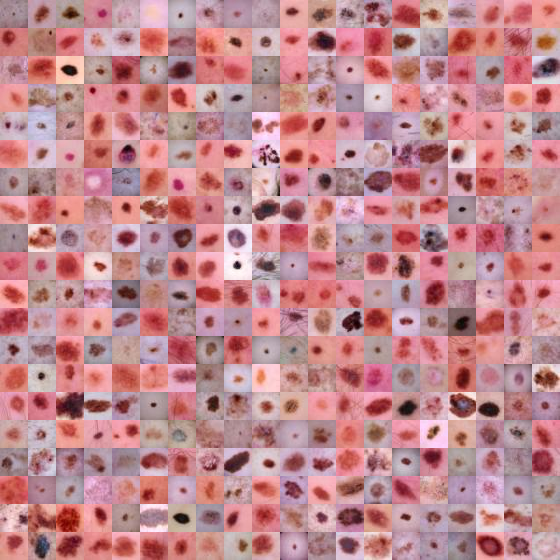

In [34]:
# the official getting_started_code
data_name = 'dermamnist'
download = True

derma = INFO[data_name]
task = derma['task']
derma_channels = derma['n_channels']
derma_classes = len(derma['label'])

DermaDataClass = getattr(medmnist, derma['python_class'])

data_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[.5], std=[.5])
    ])
train_dataset = DermaDataClass(split='train', transform=data_transform, download=True)

train_dataset.montage(length=20)

In [1]:
# automatically uncompressed data set from the website -> see main.py (in progress)
# load the npz dataset -> in pogress: combine train, val, and test because in GAN we dont have test set
def load_npz_files(file_dir):
    file = np.load(file_dir, allow_pickle=True)
    return file

In [5]:
# npz way
current_dir = os.getcwd()
# file = np.savez(current_dir + 'dermamnist.npz')
# file = np.load(current_dir + 'dermamnist.npz', allow_pickle=True)

# load npz way
derma = load_npz_files(current_dir+'/dermamnist.npz')
derma.files

['train_images',
 'val_images',
 'test_images',
 'train_labels',
 'val_labels',
 'test_labels']

In [15]:
# plot to see the label distribution in training data
label, counts = np.unique(derma['train_labels'],return_counts=True)
label_dist = dict(zip(label, counts))
print(label_dist)

{0: 228, 1: 359, 2: 769, 3: 80, 4: 779, 5: 4693, 6: 99}


array([ 228,  359,  769,   80,  779, 4693,   99])

### Derma Train Dataset Label distributions

Text(0.5, 1.0, 'different label distribution')

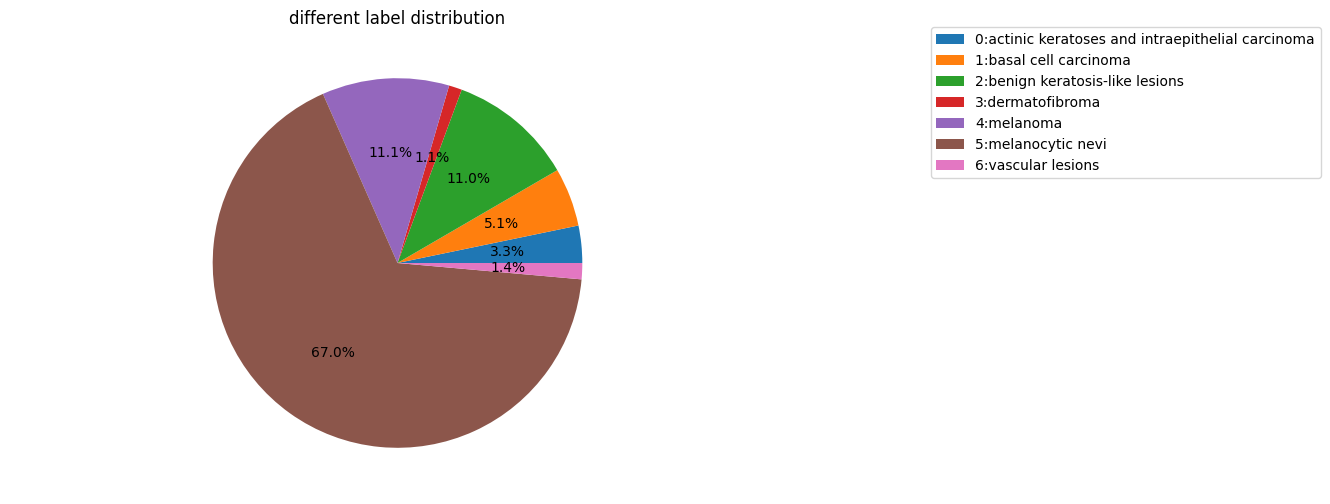

In [17]:
# hist looks no good
# plt.hist(derma['train_labels'],align='mid')
# plt.title('label distributions')
# plt.xlabel(' labels ')
# plt.ylabel('frequency counts')

# draw pie chart
plt.figure(figsize=(10,6))
labels = ["0:actinic keratoses and intraepithelial carcinoma", "1:basal cell carcinoma", "2:benign keratosis-like lesions", "3:dermatofibroma", "4:melanoma",  "5:melanocytic nevi", 
           "6:vascular lesions"]
plt.gca().axis("equal")
pie = plt.pie(counts ,autopct='%1.1f%%',startangle=0)
plt.legend(pie[0], labels, loc="upper right", bbox_to_anchor=(1.7,1.025))
plt.title('different label distribution')

In [18]:
# write a plotting function first --> will be included in main.py

def data_check_plot_figures(figures, nrows = 1, ncols=1):
    """
    Plot a dictionary of figures.

    Parameters
    ----------
    figures : <title, figure> it should be a dictionary
    ncols : number of columns of subplots wanted in the display
    nrows : number of rows of subplots wanted in the figure
    """

    fig, axeslist = plt.subplots(ncols=ncols, nrows=nrows)
    for index,title in enumerate(figures):
        axeslist.ravel()[index].imshow(figures[title])
        axeslist.ravel()[index].set_title(title)
        axeslist.ravel()[index].set_axis_off()
    plt.tight_layout() 

In [19]:
# write a function to get all indexes of different labels --> might be included in main.py

def data_check_get_indexes_of_labels(dataset):
    """
    Parameters
    ----------
    dataset : dataset that has been loaded by numpy    
    """
    index = []
    labels = len(np.unique(dataset['train_labels']))
    for i in range(labels):
        label_index = dataset['train_labels'] == i
        label_index = label_index.reshape(label_index.shape[0])
        index.append(label_index)
    return index

In [20]:
# plot some images (either this method or official method works)
# label 0: actinic keratoses and intraepithelial carcinoma

# 1. get the index without using function above
label0_index = derma['train_labels'] == 0
# reshape index for slicing
label0_index = label0_index.reshape(label0_index.shape[0])
# slice the dataset through index
label_0 = derma['train_images'][label0_index]

In [21]:
# or 2. using function 
index_ = data_check_get_indexes_of_labels(derma)
label_0 = derma['train_images'][index_[0]]

### Label0: actinic keratoses and intraepithelial carcinoma image examples

In [ ]:
derma_figures_0['image0'] # min 93, max 227, range 0-255

array([[[158, 111, 117],
        [161, 116, 121],
        [164, 121, 130],
        ...,
        [189, 160, 164],
        [187, 158, 160],
        [186, 157, 159]],

       [[160, 113, 119],
        [165, 120, 125],
        [170, 129, 137],
        ...,
        [191, 162, 166],
        [189, 160, 162],
        [188, 159, 161]],

       [[164, 119, 124],
        [170, 128, 132],
        [177, 137, 145],
        ...,
        [191, 162, 166],
        [188, 162, 165],
        [187, 161, 164]],

       ...,

       [[172, 142, 150],
        [176, 147, 152],
        [182, 150, 155],
        ...,
        [195, 167, 164],
        [181, 153, 150],
        [171, 143, 140]],

       [[176, 147, 152],
        [176, 147, 152],
        [180, 148, 153],
        ...,
        [188, 160, 157],
        [178, 150, 147],
        [171, 143, 140]],

       [[175, 146, 151],
        [173, 144, 149],
        [174, 142, 147],
        ...,
        [180, 152, 149],
        [175, 147, 144],
        [173, 145, 142]]

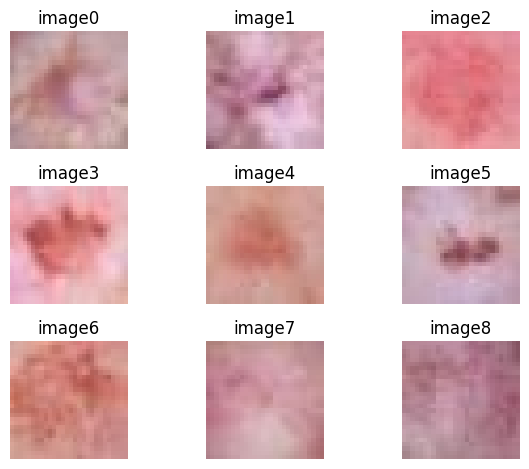

In [22]:
# lets check 9 images of label0 first
number_of_im = 9
# data dictionary for plotting function
derma_figures_0 = {'image'+str(i): label_0[i] for i in range(number_of_im)}
# plot using data_check_plot_figures
data_check_plot_figures(derma_figures_0, nrows = 3, ncols=3)

### Label1: basal cell carcinoma image examples

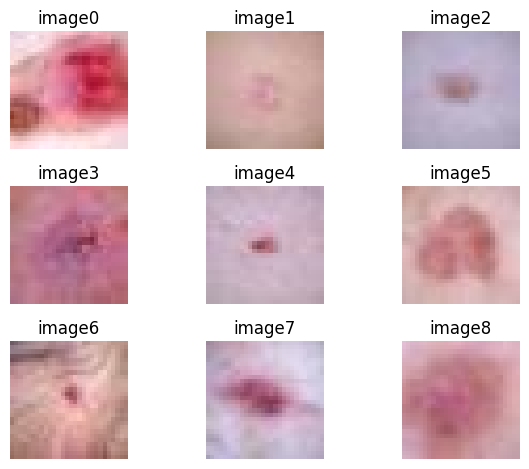

In [23]:
# label 1: basal cell carcinoma

# get the dataset 
label_1 = derma['train_images'][index_[1]]

# again plot 9 images of label1 first
number_of_im = 9
# data dictionary for plotting function
derma_figures_1 = {'image'+str(i): label_1[i] for i in range(number_of_im)}
# plot using data_check_plot_figures
data_check_plot_figures(derma_figures_1, nrows = 3, ncols=3)

### Label2: benign keratosis-like lesions

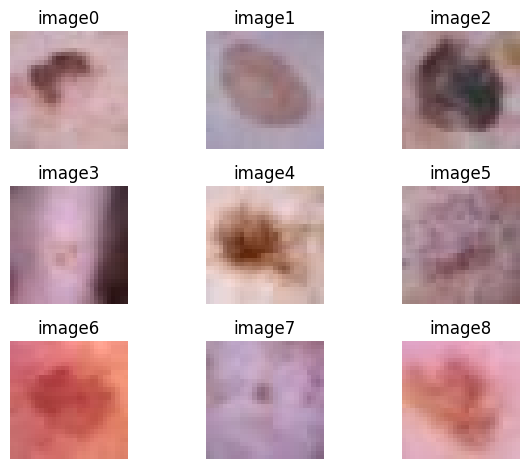

In [24]:
# label 2: benign keratosis-like lesions

# get the dataset 
label_2 = derma['train_images'][index_[2]]

# again plot 9 images of label1 first
number_of_im = 9
# data dictionary for plotting function
derma_figures_2 = {'image'+str(i): label_2[i] for i in range(number_of_im)}
# plot using data_check_plot_figures
data_check_plot_figures(derma_figures_2, nrows = 3, ncols=3)

### label 3: dermatofibroma

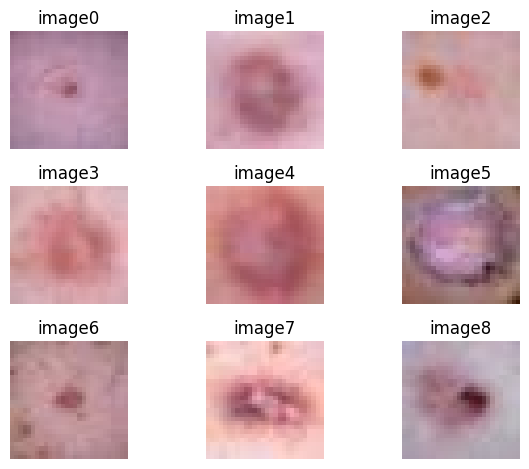

In [25]:
# get the dataset 
label_3 = derma['train_images'][index_[3]]

# again plot 9 images of label1 first
number_of_im = 9
# data dictionary for plotting function
derma_figures_3 = {'image'+str(i): label_3[i] for i in range(number_of_im)}
# plot using data_check_plot_figures
data_check_plot_figures(derma_figures_3, nrows = 3, ncols=3)

### label 4: melanoma

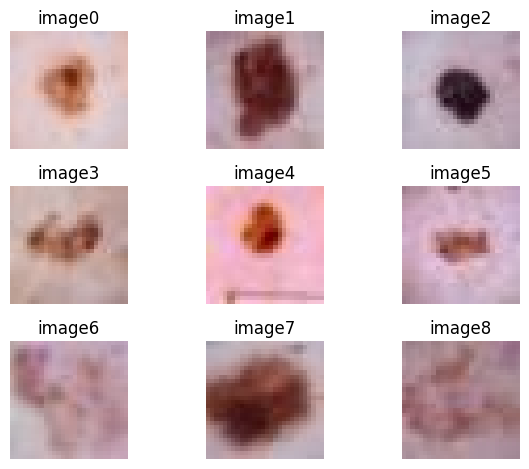

In [26]:
# get the dataset 
label_4 = derma['train_images'][index_[4]]

# again plot 9 images of label1 first
number_of_im = 9
# data dictionary for plotting function
derma_figures_4 = {'image'+str(i): label_4[i] for i in range(number_of_im)}
# plot using data_check_plot_figures
data_check_plot_figures(derma_figures_4, nrows = 3, ncols=3)

### Label 5: melanocytic nevi

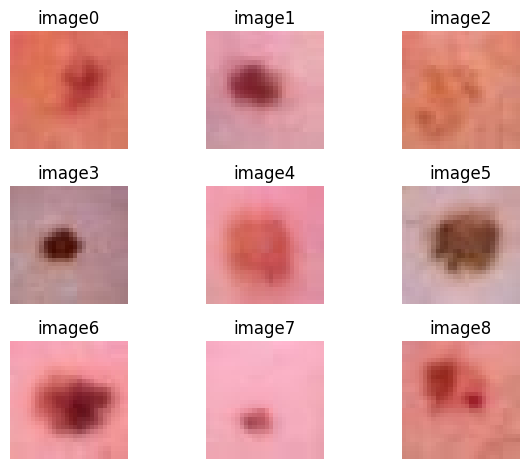

In [27]:
# get the dataset 
label_5 = derma['train_images'][index_[5]]

# again plot 9 images of label1 first
number_of_im = 9
# data dictionary for plotting function
derma_figures_5 = {'image'+str(i): label_5[i] for i in range(number_of_im)}
# plot using data_check_plot_figures
data_check_plot_figures(derma_figures_5, nrows = 3, ncols=3)

### Label 6:vascular lesions

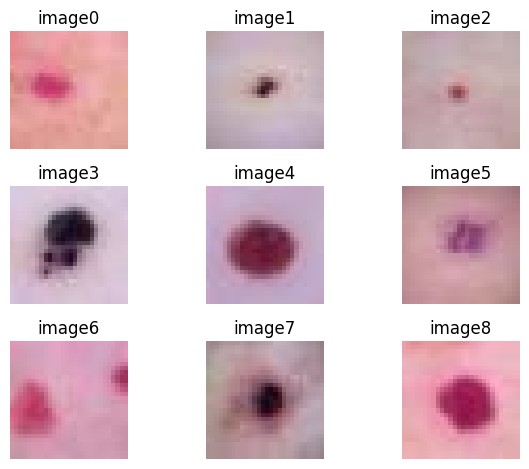

In [28]:
# get the dataset 
label_6 = derma['train_images'][index_[6]]

# again plot 9 images of label1 first
number_of_im = 9
# data dictionary for plotting function
derma_figures_6 = {'image'+str(i): label_6[i] for i in range(number_of_im)}
# plot using data_check_plot_figures
data_check_plot_figures(derma_figures_6, nrows = 3, ncols=3)